In [1]:
import numpy as np # linear algebra
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
%matplotlib inline

# Random state seed
seed = 1234

In [2]:
def load_dataset():
 train_dataset = h5py.File('/kaggle/input/happy-dataset/train_happy.h5', "r")
 test_dataset = h5py.File('/kaggle/input/happy-dataset/test_happy.h5', "r")

 train_set_x_orig = np.array(train_dataset["train_set_x"][:])
 train_set_y_orig = np.array(train_dataset["train_set_y"][:])
 test_set_x_orig = np.array(test_dataset["test_set_x"][:])
 test_set_y_orig = np.array(test_dataset["test_set_y"][:])
 classes = np.array(test_dataset["list_classes"][:])

 train_set_y_orig = np.transpose(train_set_y_orig.reshape((1, train_set_y_orig.shape[0])))
 test_set_y_orig = np.transpose(test_set_y_orig.reshape((1, test_set_y_orig.shape[0])))

 return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


train set size (600, 64, 64, 3)
train label size (600, 1)
test set size (150, 64, 64, 3)
test label size (150, 1)
classes size (2,)
[0 1]
[1]


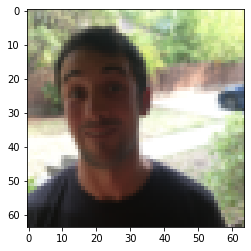

In [3]:
train_set_X, train_set_y, test_set_X, test_set_y, classes = load_dataset()
print("train set size", train_set_X.shape)
print("train label size", train_set_y.shape)
print("test set size", test_set_X.shape)
print("test label size", test_set_y.shape)
print("classes size", classes.shape)
print(classes)
print(train_set_y[123])
plt.imshow(train_set_X[123])

In [4]:
def create_validation_set(train_set_X, train_set_y, test_size=0.2, random_state=seed):
    """
    Divides the training set into training and validation set
    
    Input:
    - train_set_X: Training set samples containing only features (no label)
    - train_set_y: Training set labels
    - test_size: (optional) % of training data to be separated as validation data
    
    Output:
    - X_train: Training samples
    - y_train: Training labels
    - X_valid: Validation samples
    - y_valid: Validation labels
    """
    X_train, X_valid, y_train, y_valid = train_test_split(train_set_X, train_set_y, test_size=test_size, random_state=seed)
    print("Train set size:", X_train.shape)
    print("Validation set size:", X_valid.shape)
    return X_train, y_train, X_valid, y_valid

train_X, y_train, valid_X, y_valid = create_validation_set(train_set_X, train_set_y, test_size=0.2)
print("Train set size:", train_X.shape)
print("Train label size:", y_train.shape)
print("Validation set size:", valid_X.shape)
print("Validation set size:", y_valid.shape)

# Preparing the data
X_train = train_X.reshape(480, 64*64*3)
X_valid = valid_X.reshape(120, 64*64*3)
test_set_X = test_set_X.reshape(150, 64*64*3)
print("Training data shape", X_train.shape)
print("Validation data shape", X_valid.shape)
print("Test data shape", test_set_X.shape)

Train set size: (480, 64, 64, 3)
Validation set size: (120, 64, 64, 3)
Train set size: (480, 64, 64, 3)
Train label size: (480, 1)
Validation set size: (120, 64, 64, 3)
Validation set size: (120, 1)
Training data shape (480, 12288)
Validation data shape (120, 12288)
Test data shape (150, 12288)


In [5]:
def normalization(x, mu, std):
    """
    Normalization
    
    Input:
    - x: data
    - mu: average
    - std: standard deviation
    
    Output:
    - x_scaled: normalized output
    """
    x_scaled = (x-mu)/std
    return x_scaled

# Normalize the data
mean_X = X_train.mean()
print(mean_X)
std_X = X_train.std()
print(std_X)
X_train_scl = normalization(X_train, mean_X, std_X)
X_valid_scl = normalization(X_valid, mean_X, std_X)
X_test_scl = normalization(test_set_X, mean_X, std_X)
print("Train size", X_train_scl.shape)
print("Maximum of ttrain", X_train_scl.max())
print("Mean of ttrain", X_train_scl.mean())
print("Validation size", X_valid_scl.shape)
print("Maximum of valid", X_valid_scl.max())
print("Mean of valid", X_valid_scl.mean())
print("Test size", X_test_scl.shape)
print("Maximum of test", X_test_scl.max())
print("Mean of test", X_test_scl.mean())

142.07640957302516
81.1476808724206
Train size (480, 12288)
Maximum of ttrain 1.3915812406827983
Mean of ttrain 1.4459883907531118e-16
Validation size (120, 12288)
Maximum of valid 1.3915812406827983
Mean of valid -0.005839414109651343
Test size (150, 12288)
Maximum of test 1.3915812406827983
Mean of test -0.03412769380546628


In [6]:
# np.log(np.finfo(type(np.transpose(X_train) @ init_theta)).max)

In [7]:
# Initialize theta
def initialize_theta(no_of_features):
    """
    Initializes the parameters for logistic regression
    
    Input:
    - no_of_features: No of features in training samples
    
    Output:
    - theta: parameters 
    """
    theta = np.zeros((no_of_features+1, 1))
    return theta

def hypothesis(X_train, theta):
    """
    Defines the sigmoid function
    
    Input:
    - X_train: training samples 
    - theta: parameters
    
    Output:
    - y_hat = prediction
    """
#     y_hat = 1 / (1 + math.exp(-X_train @ theta))
    val = X_train @ theta
#     y_hat = 1 / (1 + np.exp(-val))
    y_hat = .5 * (1 + np.tanh(.5 * val))
    return y_hat

def calculate_cost(m, y_train, y_hat):
    """
    Calculates the cost function
    
    Input:
    - m: no of samples
    - y_train: training label
    - y_hat: predicted label
    
    Output:
    - J: Cost
    """
    epsilon = 1e-10 
    y_t = y_train.transpose() # transpose of y
#     y_hat_t = y_hat.transpose() # transpose of y_hat
    J = (-1/m) * (y_t @ np.log(y_hat+epsilon) + (1-y_t) @ np.log(1-y_hat+epsilon))
    return J

def calculate_gradient(m, X_train, y_train, y_hat):
    """
    Calculates gradient of the cost function for logistic regression
    
    Input:
    - m: no of samples
    - X_train: Training features
    - y_train: Training labels
    - y_hat: Predicted output by the sigmoid function
    
    Output:
    - Del_J: the gradient of the cost function
    """
    trans_X = X_train.transpose()
    Del_J = (1/m) * trans_X @ (y_hat - y_train)
    return Del_J

def update_theta(theta, alpha, del_j):
    """
    Updates logistic regression parameters
    
    Input: 
    - theta: parameters
    - alpha: learning rate
    - del_j: gradient of the cost function
    
    Output:
    - theta_up: Updated parameters
    """
    theta_up = theta - alpha * del_j
    return theta_up

def gradient_descent(X, y, theta, alpha, iters):
    """
    Performs gradient descent
    
    Input:
    - X: training samples
    - y: training labels
    - theta: parameters to be updated
    - alpha: learning rate
    - iters: no of iterations
    
    Output:
    - theta: updated theta
    - J: cost 
    """
    J = np.zeros(iters)
    m = X.shape[0]
    for i in range(0, iters):
        m = X.shape[0]
        y_hat = hypothesis(X, theta)
        J[i] = calculate_cost(m=m, y_train=y, y_hat=y_hat)
        del_j = calculate_gradient(m=m, X_train=X, y_train=y, y_hat=y_hat)
        theta = update_theta(theta, alpha, del_j)
    return theta, J

No of training samples 480
No of features 12288


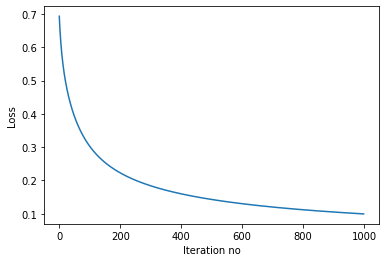

In [8]:
##################
# Normalized data
##################
m = X_train.shape[0] # no of training samples
print("No of training samples", m)
n = X_train.shape[1] # no of features
print("No of features", n)
X_train_app = np.c_[np.ones(m), X_train_scl] # append a column of 1
X_valid_app = np.c_[np.ones(120), X_valid_scl] # append a column of 1
X_test_app = np.c_[np.ones(150), X_test_scl] # append a column of 1
alpha = 1e-3 # learning rate
iters = 1000 # no of iterations
initial_theta = initialize_theta(n)
theta, J = gradient_descent(X=X_train_app, y=y_train, theta=initial_theta, alpha=alpha, iters=iters)
plt.plot(range(0,iters), J)
plt.xlabel("Iteration no")
plt.ylabel("Loss")
plt.savefig("Loss_vs_iteration.png")

In [9]:
y_valid_hat = hypothesis(X_valid_app, theta)
y_valid_pred = np.round(y_valid_hat)
val_acc = (y_valid_pred == y_valid).sum()/120
print("Validation Accuracy", val_acc)
y_train_hat = hypothesis(X_train_app, theta)
y_train_pred = np.round(y_train_hat)
train_acc = (y_train_pred == y_train).sum()/m
print("Training accuracy", train_acc)

Validation Accuracy 0.9333333333333333
Training accuracy 0.9875


In [10]:
f = y_train_pred == y_train
print(f.shape)
print(f.sum())

(480, 1)
474


In [11]:
y_test_pred = np.round(hypothesis(X_test_app, theta))
test_acc = (y_test_pred == test_set_y).sum()/150
print("Test accuracy", test_acc)

Test accuracy 0.9533333333333334


In [12]:
# print(alpha)

In [13]:
# alpha_list_1 = np.geomspace(1e-5, 1, 6)
# alpha_list_2 = np.linspace(2, 15, 13)
# alpha_list = np.append(alpha_list_1, alpha_list_2)
# print(alpha_list)

In [14]:
print(n)

12288


In [15]:
def select_subset_from_dataset(imgs, labels, ratio=0.1, shuffle=True, seed=1234):
  """
  Args:
     imgs: numpy array representing the image set from which 
        the selection is made.
     labels: the labels associated with the provided images.
     ratio (optional): portion of the data to be selected. Default: 0.1.
     shuffle (optional): Whether or not to shuffle the data. Default: True.
     seed (optional): seed of the numpy random generator: Default: 1234.
        
  Return:
     A tuple of 2 elements (select_imgs, select_labels)
     where:
        select_imgs: a numpy array of the selected images.
        select_labels: labels associated with the selected images.
      
  """
  if shuffle:
    np.random.seed(seed)  # Set the random seed of numpy.
    indices = np.random.permutation(imgs.shape[0])
  else:
    indices = np.arange(imgs.shape[0])
  idx, _ = np.split(indices, [int(ratio*len(indices))])
  select_imgs = imgs[idx]
  tgt = np.array(labels)
  select_labels = tgt[idx]#.tolist()
  return select_imgs, select_labels


select_imgs, select_labels = select_subset_from_dataset(
    X_train_app, y_train, 0.1
)
print("Type of X", type(select_imgs), "Shape:", select_imgs.shape)
print("Type of y", type(select_labels), "Shape:", select_labels.shape)

Type of X <class 'numpy.ndarray'> Shape: (48, 12289)
Type of y <class 'numpy.ndarray'> Shape: (48, 1)


In [16]:
# print((y_test_pred_pr==test_set_y).sum())

In [17]:
# test_acc_pr

In [18]:
percent_data = np.linspace(0.1, 1.0, 19)
# print(percent_data)
test_acc_pr=np.zeros(percent_data.shape[0])
ix = 0
for pr in percent_data:
    print("training set size", pr)
    init_theta = initialize_theta(n)
#     print(init_theta)
    pr_train_X, pr_train_y = select_subset_from_dataset(X_train_app, y_train, ratio=pr)
    theta_pr, J_pr = gradient_descent(pr_train_X, pr_train_y, init_theta, 1e-3, 1000)
    y_test_pred_pr = np.round(hypothesis(X_test_app, theta_pr))
    test_acc_pr[ix] = (y_test_pred_pr == test_set_y).sum()/150
    print("test accuracy:",test_acc_pr[ix],"\n")
    ix += 1


training set size 0.1
test accuracy: 0.84 

training set size 0.15000000000000002
test accuracy: 0.8333333333333334 

training set size 0.2
test accuracy: 0.86 

training set size 0.25
test accuracy: 0.8933333333333333 

training set size 0.30000000000000004
test accuracy: 0.8933333333333333 

training set size 0.35
test accuracy: 0.88 

training set size 0.4
test accuracy: 0.9 

training set size 0.45000000000000007
test accuracy: 0.9133333333333333 

training set size 0.5
test accuracy: 0.94 

training set size 0.55
test accuracy: 0.94 

training set size 0.6
test accuracy: 0.94 

training set size 0.65
test accuracy: 0.94 

training set size 0.7000000000000001
test accuracy: 0.94 

training set size 0.75
test accuracy: 0.9466666666666667 

training set size 0.8
test accuracy: 0.9533333333333334 

training set size 0.85
test accuracy: 0.9533333333333334 

training set size 0.9
test accuracy: 0.9533333333333334 

training set size 0.9500000000000001
test accuracy: 0.9533333333333334 


learning rate 1e-05
test accuracy 0.6266666666666667
Elapsed time 27.746481895446777


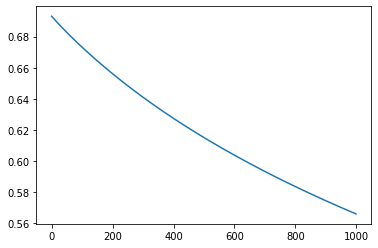




learning rate 5e-05
test accuracy 0.8133333333333334
Elapsed time 27.993507385253906


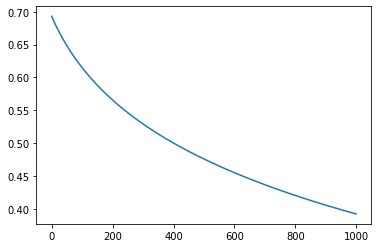




learning rate 0.0001
test accuracy 0.86
Elapsed time 27.94371271133423


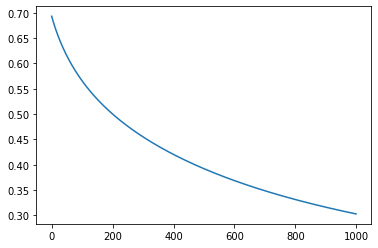




learning rate 0.0005
test accuracy 0.9466666666666667
Elapsed time 28.41113305091858


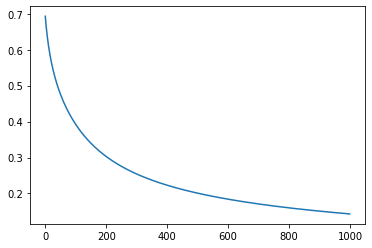




learning rate 0.001
test accuracy 0.9533333333333334
Elapsed time 28.194879055023193


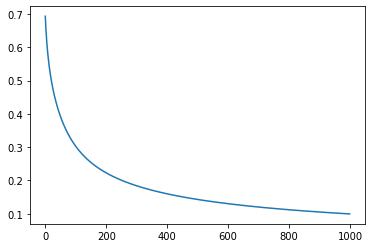




learning rate 0.005
test accuracy 0.94
Elapsed time 28.40638542175293


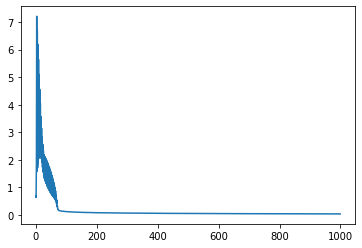




learning rate 0.01
test accuracy 0.9466666666666667
Elapsed time 28.03858470916748


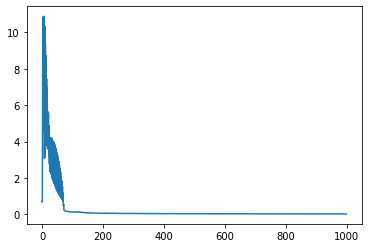




learning rate 0.05
test accuracy 0.9333333333333333
Elapsed time 27.658914804458618


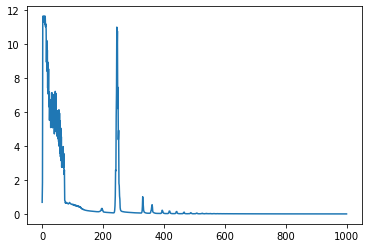




learning rate 0.1
test accuracy 0.92
Elapsed time 28.205150842666626


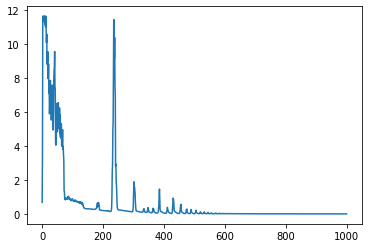

In [19]:
# alpha_list_1 = np.geomspace(1e-5, 1, 6)
# alpha_list_2 = np.linspace(2, 150, 20)
# alpha_list = np.append(alpha_list_1, alpha_list_2)
alpha_list = np.array([1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1])
test_acc_list=np.zeros(alpha_list.shape[0])
idx=0
# print(test_acc_list)
elapsed_time = np.zeros(alpha_list.shape[0])
for lr in alpha_list:
    elapsed_time[idx] = time.time()
    print("learning rate", lr)
    initial_theta = initialize_theta(n)
    theta_list, J_list = gradient_descent(X=X_train_app, y=y_train, theta=initial_theta, alpha=lr, iters=iters)
    y_test_pred_list = np.round(hypothesis(X_test_app, theta_list))
    test_acc_list[idx] = (y_test_pred_list == test_set_y).sum()/150
    print("test accuracy",test_acc_list[idx])
    elapsed_time[idx] = time.time() - elapsed_time[idx]
    print("Elapsed time", elapsed_time[idx])
    plt.figure(idx)
    plt.plot(range(0,iters), J_list)
    plt.savefig("Loss_vs_lr_{}.png".format(lr))
    plt.show()
    print("\n\n")
    idx += 1

Text(0, 0.5, 'Test accuracy')

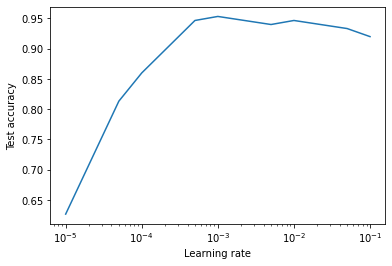

In [20]:
plt.plot(alpha_list, test_acc_list)
plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Test accuracy")


test accuracy 0.92
Elapsed time 28.758897304534912


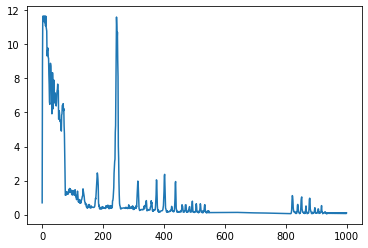

In [21]:
elapsed = time.time()
# print("learning rate", lr)
initial_theta = initialize_theta(n)
theta_list, J_notlist = gradient_descent(X=X_train_app, y=y_train, theta=initial_theta, alpha=1, iters=iters)
y_test_pred_notlist = np.round(hypothesis(X_test_app, theta_list))
test_acc_notlist = (y_test_pred_list == test_set_y).sum()/150
print("test accuracy",test_acc_notlist)
elapsed = time.time() - elapsed
print("Elapsed time", elapsed)
# plt.figure()
plt.plot(range(0,iters), J_notlist)
plt.show()
print("\n\n")

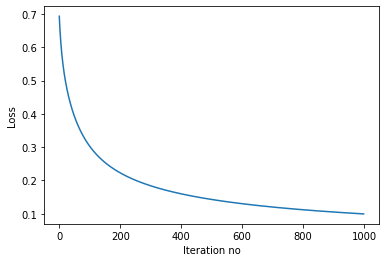

In [22]:
#############
## Plot Loss
#############
plt.plot(range(0,iters), J)
plt.xlabel("Iteration no")
plt.ylabel("Loss")
plt.savefig("Loss_vs_iteration.png")
plt.show()

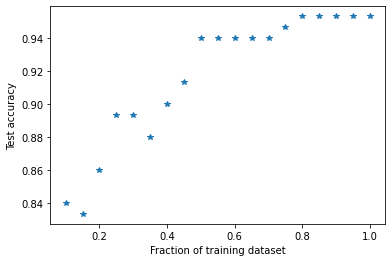

In [23]:

############
## Plot accuracy vs training dataset size
############
plt.plot(percent_data, test_acc_pr, '*')
plt.xlabel("Fraction of training dataset")
plt.ylabel("Test accuracy")
plt.savefig("accuracy_vs_training_size.png")
plt.show()

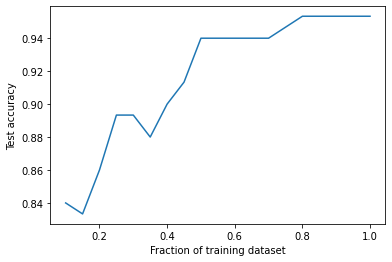

In [24]:

############
## Plot accuracy vs training dataset size
############
plt.plot(percent_data, test_acc_pr)
plt.xlabel("Fraction of training dataset")
plt.ylabel("Test accuracy")
plt.savefig("accuracy_vs_training_size_connected.png")
plt.show()

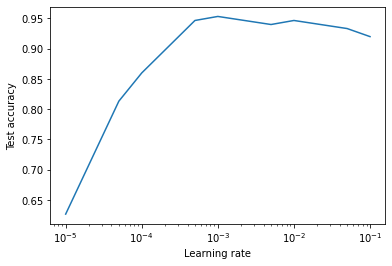

In [25]:
############
## Plot accuracy vs learning rate
plt.plot(alpha_list, test_acc_list)
plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Test accuracy")
plt.savefig("lr_vs_training_size.png")
plt.show()

In [26]:
# idx=0
# for lr in alpha_list:
# #     print(lr)
# #     initial_theta = initialize_theta(n)
# #     theta, J = gradient_descent(X=X_train_app, y=y_train, theta=initial_theta, alpha=alpha, iters=iters)
# #     y_test_pred = np.round(hypothesis(X_test_app, theta))
#     test_acc_list[idx] = 15*lr
#     idx += 1
print(test_acc_list)

[0.62666667 0.81333333 0.86       0.94666667 0.95333333 0.94
 0.94666667 0.93333333 0.92      ]
